# 1. Carga Datos

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [13]:
data = np.load('proyecto_training_data.npy')
data.shape

(1460, 6)

# 2. Train - Test Split

In [69]:
len_train = int(np.ceil(len(data)*0.8))
len_test = len(data)-len_train

In [70]:
X_train = data[:len_train,1:]
y_train = data[:len_train,0].reshape(-1,1)
print(X_train.shape)
print(y_train.shape)

(1168, 5)
(1168, 1)


In [71]:
X_test = data[len_train:,1:]
y_test = data[len_train:,0].reshape(-1,1)
print(X_test.shape)
print(y_test.shape)

(292, 5)
(292, 1)


In [77]:
col_names = ['OverallQual','1stFlrSF','TotRms','YearBuilt','LotFrontage']

In [135]:
X_train_df = pd.DataFrame(X_train, columns=col_names)
X_train_df

,OverallQual,1stFlrSF,TotRms,YearBuilt,LotFrontage
0,7.00,856.00,8.00,"2,003.00",65.00
1,6.00,"1,262.00",6.00,"1,976.00",80.00
2,7.00,920.00,6.00,"2,001.00",68.00
3,7.00,961.00,7.00,"1,915.00",60.00
4,8.00,"1,145.00",9.00,"2,000.00",84.00
...,...,...,...,...,...
1163,4.00,"1,258.00",6.00,"1,969.00",60.00
1164,5.00,"1,432.00",5.00,"1,978.00",NaN
1165,7.00,"1,502.00",7.00,"2,009.00",79.00
1166,8.00,"1,694.00",7.00,"2,008.00",64.00


# 3. Analisis Exploratorio

In [134]:
X_train_nna = pd.melt(X_train_df).dropna()

In [112]:
print('Analisis Exploratorio')
print(X_train_nna.groupby(by='variable').agg(['mean','max','min',np.ptp,'std']))

Analisis Exploratorio
               value                                  
                mean      max      min      ptp    std
variable                                              
1stFlrSF    1,156.32 3,228.00   334.00 2,894.00 373.78
LotFrontage    69.95   313.00    21.00   292.00  23.48
OverallQual     6.10    10.00     1.00     9.00   1.38
TotRms          6.49    14.00     2.00    12.00   1.61
YearBuilt   1,971.45 2,010.00 1,875.00   135.00  29.95


# 4. Histogramas

C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


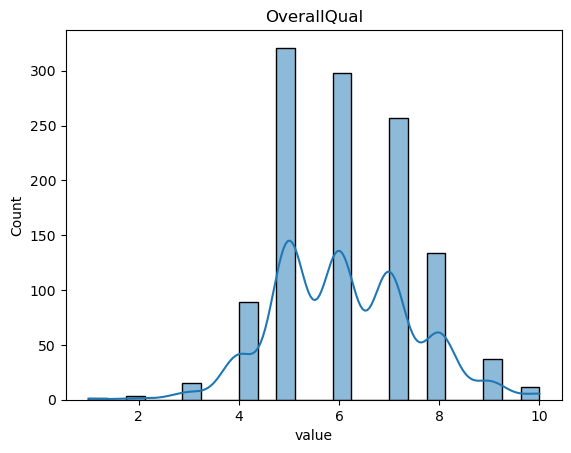

C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


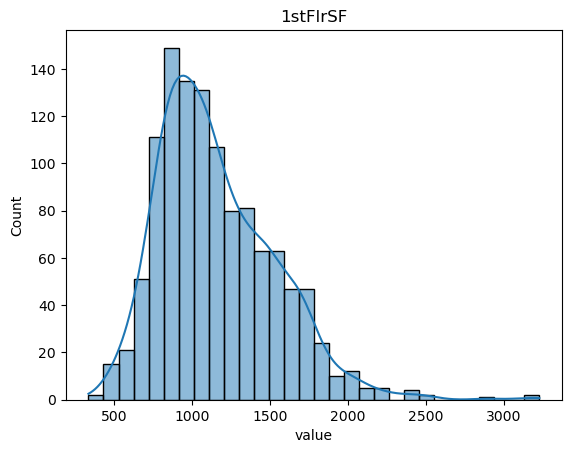

C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


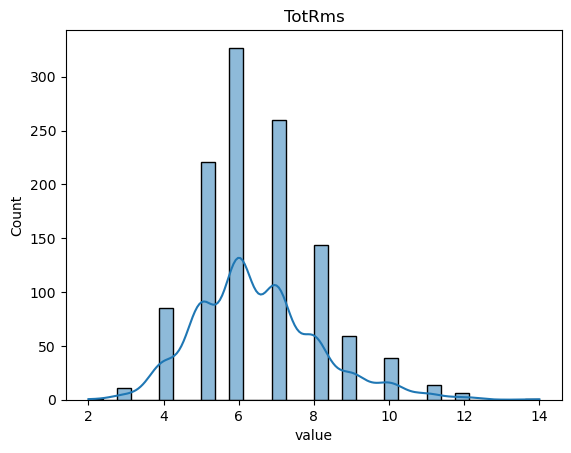

C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


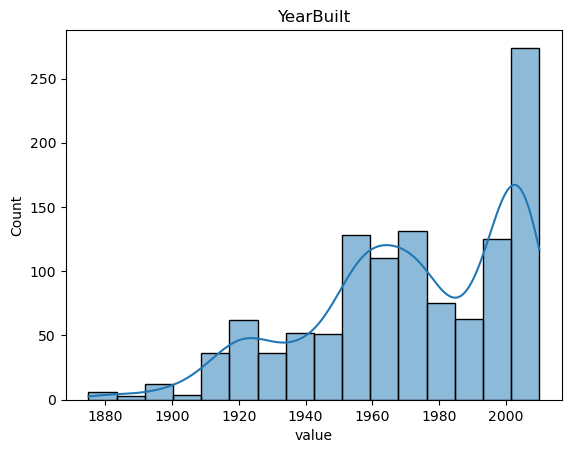

C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bmhernandez\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


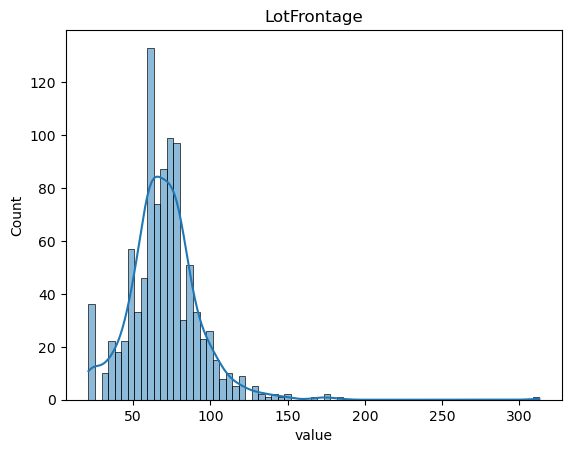

In [132]:
for var in X_train_nna['variable'].unique():
    _ = sns.histplot(X_train_nna[X_train_nna['variable']==var], x='value', kde='True')
    plt.title(var)
    plt.show()

# 5. Coeficiente correlación

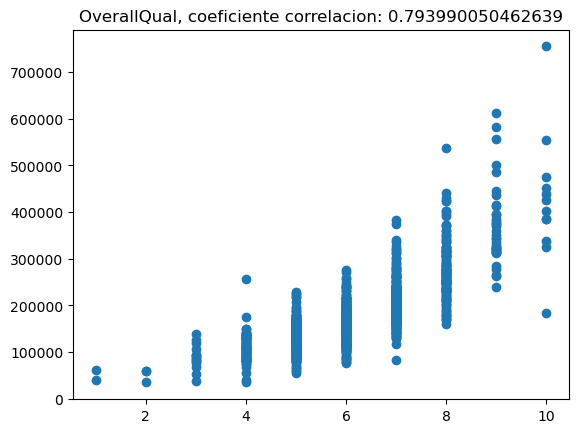

In [249]:
for i in range(1):
    nan_index = np.isnan(X_train[:,i]) # para quitar nulls de ambos arrays
    y = y_train.flatten()[~nan_index]
    x = X_train[:,i][~nan_index]
    cxy = np.corrcoef(y,x)[0,1]
    var_name = col_names[i]
    plt.scatter(x,y)
    plt.title(f'{var_name}, coeficiente correlacion: {cxy}')
    plt.show()
    print('')

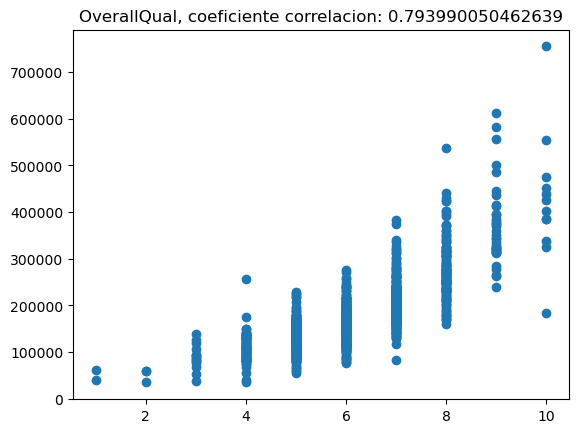

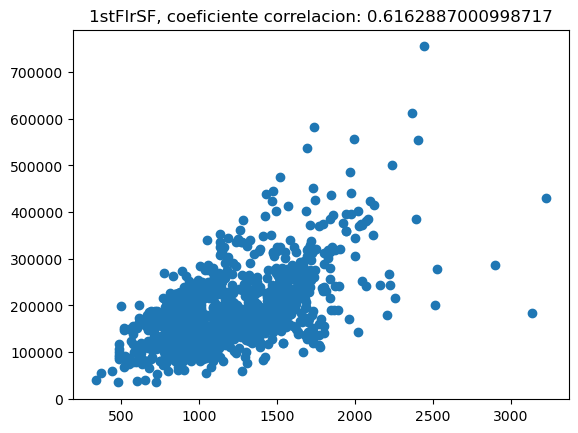

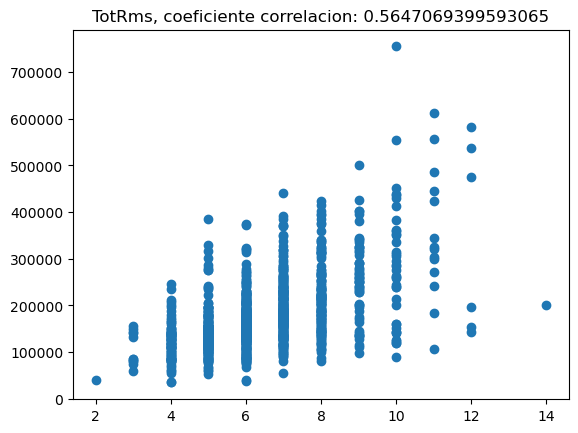

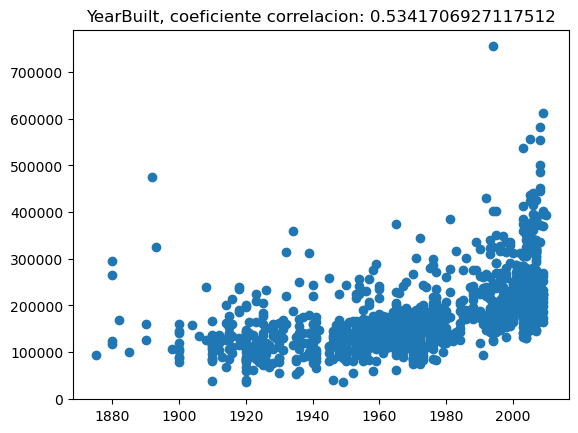

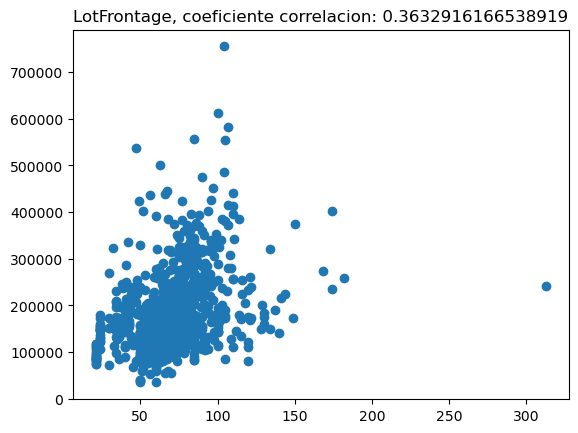

In [248]:
for i in range(X_train.shape[1]):
    nan_index = np.isnan(X_train[:,i]) # para quitar nulls de ambos arrays
    y = y_train.flatten()[~nan_index]
    x = X_train[:,i][~nan_index]
    cxy = np.corrcoef(y,x)[0,1]
    var_name = col_names[i]
    plt.scatter(x,y)
    plt.title(f'{var_name}, coeficiente correlacion: {cxy}')
    plt.show()
    print('')

De acuerdo a los resultados se utilizaran las variables 1 y 2. OverallQual y 1stFlSF que son las que possen mayor coeficiente de correlación

# 6. Funcion Regresión Lineal

Se utilizar la funcion de costo:
Mean Squared error, donde se calcula la diferencia entre la prediccion y el valor real, se eleva al cuadrado y se suman todos los samples </br>
La idea es que en cada iteracion se calcula el gradiente del error y se actualizan los parametros restando el parametro actual - learning rate * Gradiente de error

In [353]:
def Linear_reg(X,y,epoch=30,imprimir_error_cada=10,alpha=0.01):
    # inicializar valores a retornar
    error_vec = np.empty(epoch)
    training = {}
    
    # inicializacion de vector b
    b = np.array([[1],[1]])
    
    # quitar nan y transformando las matrices
    X = X.reshape(-1,1)
    nan_index = np.isnan(X)
    X_clean = X[~nan_index]
    y_clean = y[~nan_index]
    n = len(y_clean)
    X = np.hstack((np.ones(len(X_clean)).reshape(-1,1),X_clean.reshape(-1,1)))
    y = y_clean.reshape(-1,1)
    
    for i in range(epoch):
        # Calculo de prediccion y error
        y_pred = (X@b)
        v_error = (y_pred-y)
        error = np.sum(v_error**2)/(2*n)

        # guardar error y parametros actuales
        error_vec[i] = error 
        training[i] = (b,X_clean,y)

        # Calculo de gradiente. Se debe multiplicar cada error de la muestra por su respectivo valor de x
        # Debemos acostar la matriz de error para poder multiplicar por x (o 1 en el caso de B0)
        gradiente = ((v_error.T)@X)*(1/n)  # obtendremos una matriz de 1x2 (resultado de multiplicar (1*n) X (n*2)

        # transponemos el vector para poder restarlo con la iteracion anterior.
        b = b - alpha*(gradiente.T)
        if (i+1)%imprimir_error_cada == 0:
            print(f'Iteración número {i+1}, error: {error}')
    
    return error_vec, training

In [401]:
error, modelo = Linear_reg(X_train[:,0],y_train, epoch=50, alpha=0.01)
# alpha 0.01 para variable 0
# alpha 0.0000001 para variable 1

Iteración número 10, error: 1394458264.0580976
Iteración número 20, error: 1390351558.9245644
Iteración número 30, error: 1388056631.0603476
Iteración número 40, error: 1385783400.7546132
Iteración número 50, error: 1383531600.189866


In [402]:
def graph_error(error):
    plt.plot(range(len(error)),error)
    plt.title('Error de entrenamiento')
    plt.ylabel('Error')
    plt.xlabel('Iteración')

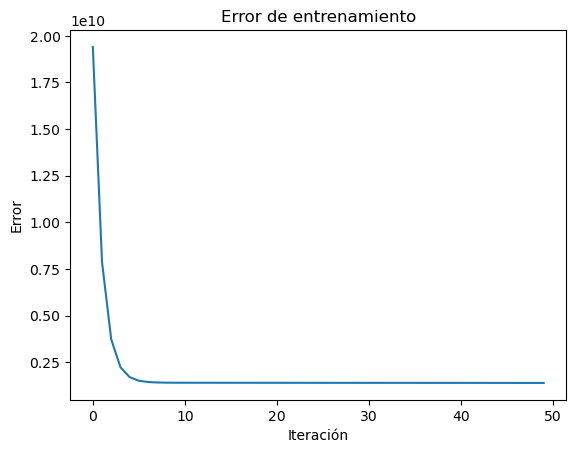

In [403]:
graph_error(error)

In [406]:
def graph_evolucion(error, modelo, n=5):
    iters = len(modelo.keys())
    for it in range(iters):
        if (it+1)%n ==0:
            b = modelo[it][0]
            X = modelo[it][1]
            y = modelo[it][2]
            er = error[it]
            X_graph = np.linspace(X.min(),X.max(),20)
            y_pred = np.hstack((np.ones(20).reshape(-1,1),X_graph.reshape(-1,1)))@b
            
            print(X_graph.shape)
            print(y_pred.shape)
            plt.scatter(X_graph, y_pred, c='b', label='predict')
            plt.scatter(X, y, c='r', label='real')
            plt.legend()
            plt.title(f'Iteración: {it+1}, Error {er}')
            plt.show()

(20,)
(20, 1)


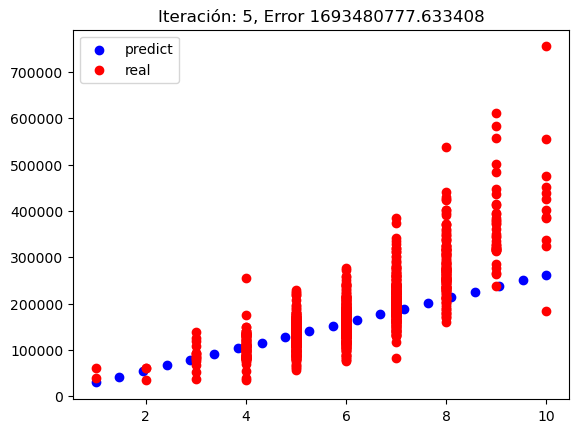

(20,)
(20, 1)


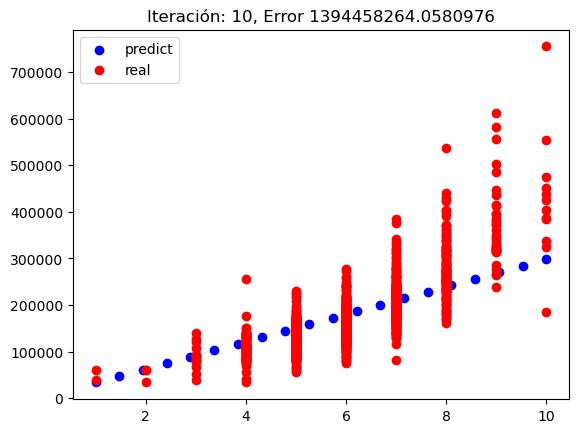

(20,)
(20, 1)


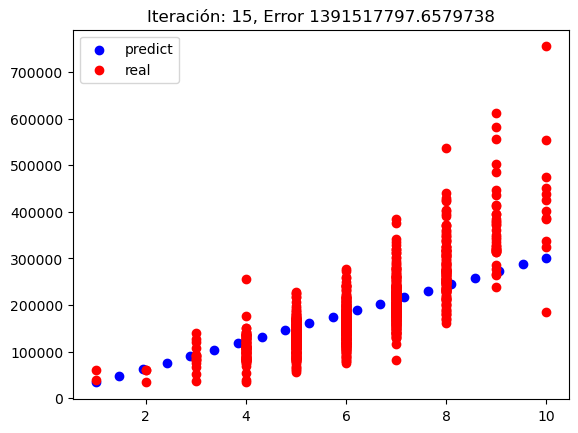

(20,)
(20, 1)


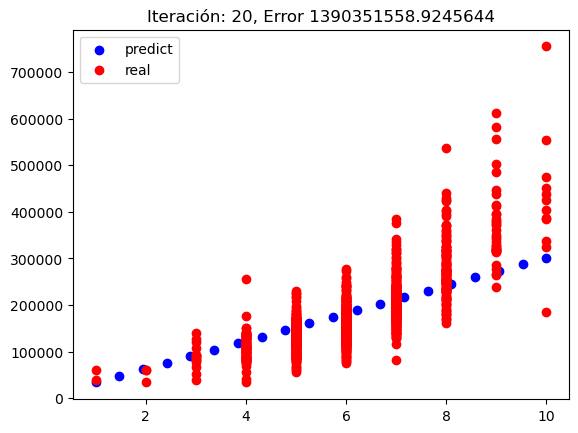

(20,)
(20, 1)


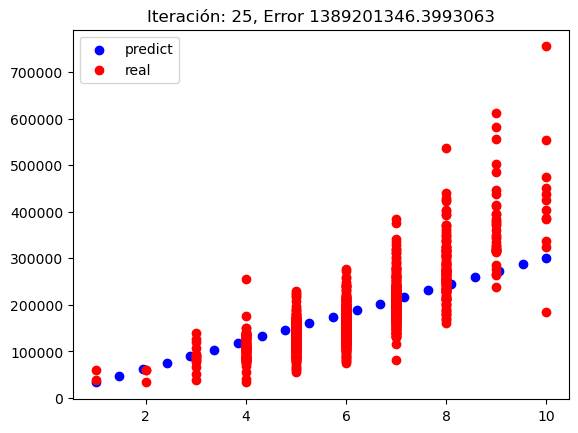

(20,)
(20, 1)


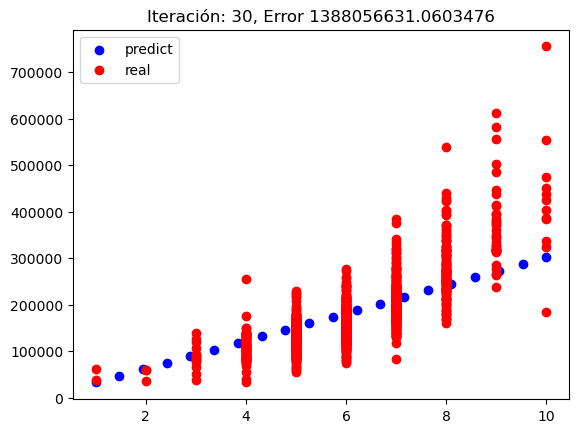

(20,)
(20, 1)


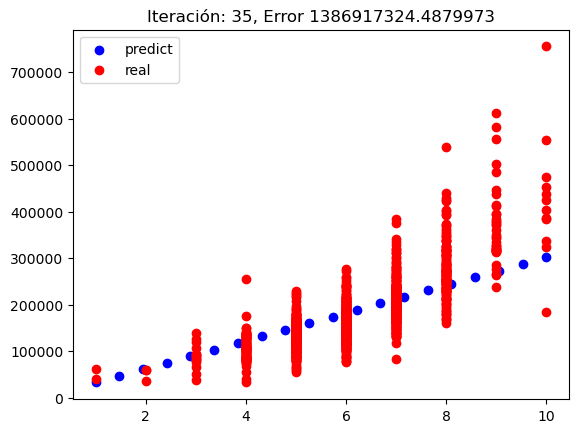

(20,)
(20, 1)


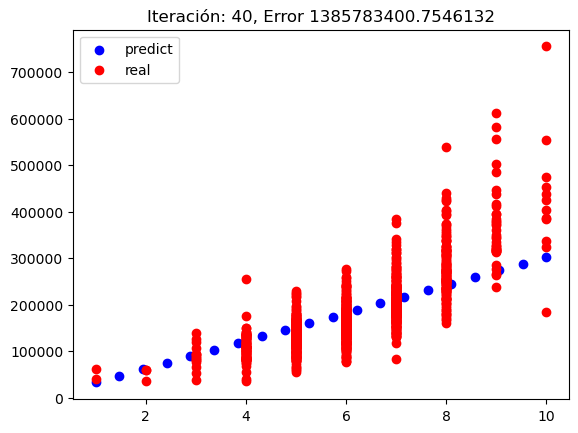

(20,)
(20, 1)


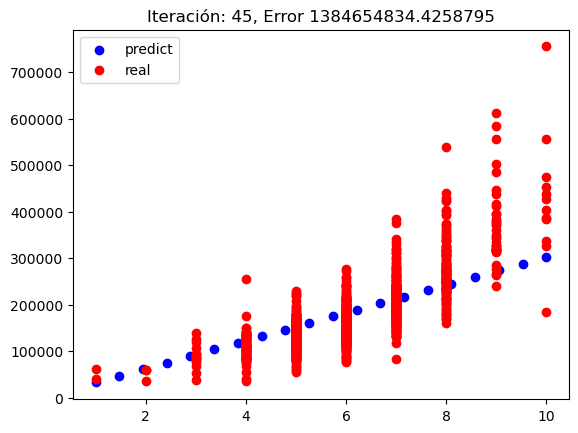

(20,)
(20, 1)


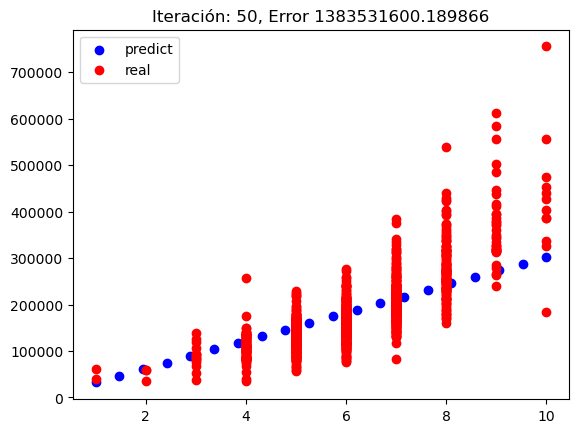

In [407]:
_ = graph_evolucion(error, modelo)

### Entrenamiento con Sklearn

Entrenar un modelo con las 2 variables seleccionadas

In [420]:
from sklearn.linear_model import LinearRegression

In [422]:
a = LinearRegression(X,)

# Creacion de Clase

In [543]:
class Linear_Regression():
    def __init__(self, epoch=50, alpha=0.01):
        self.epoch = epoch
        self.alpha = alpha
    def product(self):
        return 3
    def prueba(self):
        print('Hola',self.epoch)
    def fit_my_model(self, X ,y, epoch=50, imprimir_error_cada=10, alpha=0.01):
        '''
        Parameters:
        X: 1d-np array
        y: 1d-np array
        imprimir_error_cada: int
        alpha: float
        
        Return:
        error_vec: 1d-np array
        training: dic with number of iteration as key and b vector as values.
        
        '''
        # guardar datos
        self.X = X
        self.y = y
        self.epoch = epoch
        self.print_e = imprimir_error_cada
        self.alpha = alpha
        
        # inicializar valores a retornar
        error_vec = np.empty(epoch)
        training = {}
                
        # inicializacion de vector b
        b = np.array([[1],[1]])

        # quitar nan y transformando las matrices
        X = X.reshape(-1,1)
        nan_index = np.isnan(X)
        X_clean = X[~nan_index]
        y_clean = y[~nan_index]
        n = len(y_clean)
        X = np.hstack((np.ones(len(X_clean)).reshape(-1,1),X_clean.reshape(-1,1)))
        y = y_clean.reshape(-1,1)

        for i in range(epoch):
            # Calculo de prediccion y error
            y_pred = (X@b)
            v_error = (y_pred-y)
            error = np.sum(v_error**2)/(2*n)

            # guardar error y parametros actuales
            error_vec[i] = error 
            training[i] = b

            # Calculo de gradiente. Se debe multiplicar cada error de la muestra por su respectivo valor de x
            # Debemos acostar la matriz de error para poder multiplicar por x (o 1 en el caso de B0)
            gradiente = ((v_error.T)@X)*(1/n)  # obtendremos una matriz de 1x2 (resultado de multiplicar (1*n) X (n*2)

            # transponemos el vector para poder restarlo con la iteracion anterior.
            b = b - alpha*(gradiente.T)
            if (i+1)%imprimir_error_cada == 0:
                print(f'Iteración número {i+1}, error: {error}')
        
        # Guardar resultados del modelo entrenado.
        self.error_vec = error_vec
        self.training = training
        return error_vec, training
    
    def graph_error(self):
        plt.plot(range(len(self.error_vec)),self.error_vec)
        plt.title('Error de entrenamiento')
        plt.ylabel('Error')
        plt.xlabel('Iteración')
    
    def graph_evolution(self, n=5):
        iters = len(self.training.keys())
        for it in range(iters):
            if (it+1)%n ==0:
                b = self.training[it]
                X = self.X
                y = self.y
                er = self.error_vec[it]
                X_graph = np.linspace(X.min(),X.max(),20)
                print(b.shape)
                print(np.hstack((np.ones(20).reshape(-1,1),X_graph.reshape(-1,1))).shape)
                y_pred = np.hstack((np.ones(20).reshape(-1,1),X_graph.reshape(-1,1)))@b

                print(X_graph.shape)
                print(y_pred.shape)
                plt.scatter(X_graph, y_pred, c='b', label='predict')
                plt.scatter(X, y, c='r', label='real')
                plt.legend()
                plt.title(f'Iteración: {it+1}, Error {er}')
                plt.show()
    def fit_sk_model(self):
        from sklearn.linear_model import LinearRegression
        sk_model = LinearRegression(fit_intercept=True)
        sk_model.fit(self.X.reshape(-1,1),self.y.reshape(-1,1))
        self.sk_model = sk_model
        return sk_model
    def predict_my_model():
        self.training[max(self.training.keys())]
        
    def final_model(self, X):
        y_my_model = (np.hstack((np.ones(len(X)).reshape(-1,1),X.reshape(-1,1)))@self.training[max(self.training.keys())]).reshape(-1,1)
        
        # modelo con sklearn
        a = self.fit_sk_model()
        y_skmodel = a.predict(X.reshape(-1,1))
        
        y_final = (y_my_model + y_skmodel)/2      
        return y_my_model, y_skmodel, y_final    
    def mse(self, y_true, y_pred):
        return np.sum((y_true.flatten()-y_pred.flatten())**2)/len(y_true)
    def score_models(self, X_a):
        mm, skm, fm = self.final_model(X_a)
        mm_error = mse(
        print('ER
        
        

In [544]:
LR = Linear_Regression()
a,b = LR.fit_my_model(X_train[:,0],y_train, imprimir_error_cada=10)

Iteración número 10, error: 1394458264.0580976
Iteración número 20, error: 1390351558.9245644
Iteración número 30, error: 1388056631.0603476
Iteración número 40, error: 1385783400.7546132
Iteración número 50, error: 1383531600.189866


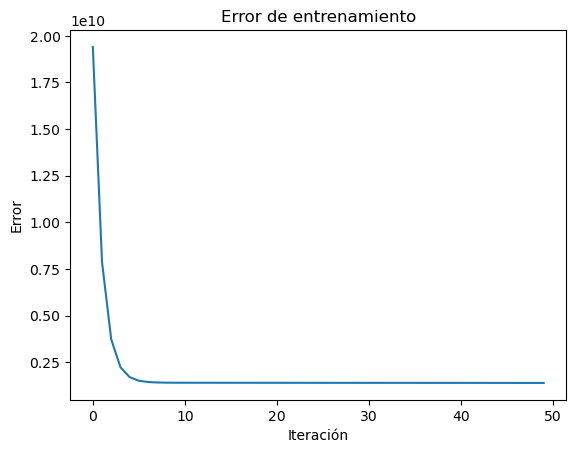

In [545]:
LR.graph_error()

In [546]:
LR.final_model(X_train[:,0])

(array([[212225.76270913],
        [182237.49049305],
        [212225.76270913],
        ...,
        [212225.76270913],
        [242214.03492521],
        [182237.49049305]]),
 array([[221414.42013537],
        [176002.42135622],
        [221414.42013537],
        ...,
        [221414.42013537],
        [266826.41891453],
        [176002.42135622]]),
 array([[216820.09142225],
        [179119.95592463],
        [216820.09142225],
        ...,
        [216820.09142225],
        [254520.22691987],
        [179119.95592463]]))

In [515]:
a.score(a.predict(X_train[:,0].reshape(-1,1)),y_train.reshape(-1,1))

-12135481652.24064

In [510]:
a.predict(np.arange(1,9,1).reshape(-1,1))

array([[-51057.57253958],
       [ -5645.57376042],
       [ 39766.42501874],
       [ 85178.4237979 ],
       [130590.42257706],
       [176002.42135622],
       [221414.42013537],
       [266826.41891453]])

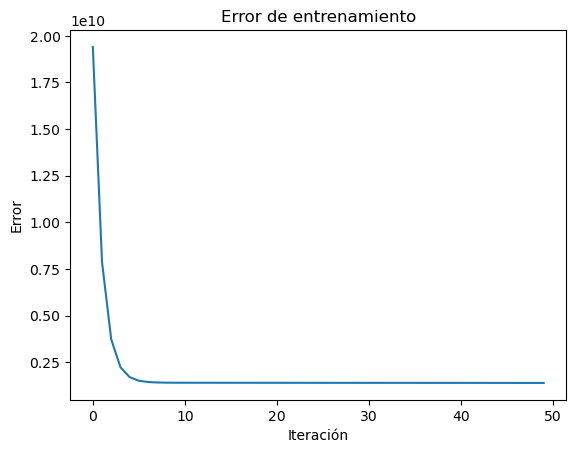

In [496]:
LR.graph_error()

In [ ]:
LR.graph_evolution(n=10)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics
a = LinearRegression()
a.fit(X_train[:,0].reshape(-1,1),y_train.reshape(-1,1))